# **K-means on images**

Use the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)


In [1]:
#Image segmentation from video using OpenCV and K-means clustering
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(128, 128, 3) (49152,)


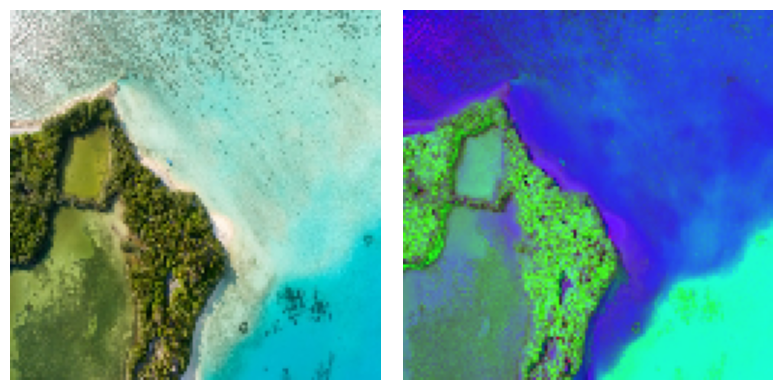

In [11]:

original_image =cv2.imread('/content/image1.jpeg')


# Resize to a feasible size to avoid extensive computation
#resduce el tamaño de la imagen
original_image = cv2.resize(original_image,(128,128))

# Convert from BGR Color Space to HSV
img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)

_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow(img_rgb), axes[0].set_axis_off() #RGB
axes[1].imshow(img_hsv), axes[1].set_axis_off() #HSV
plt.tight_layout()
print(original_image.shape, original_image.flatten().shape)

In [27]:
#kmeans pide n muestras por numero de caracteristicas
# Vectorize to compute kmeans
vectorized_rgb = img_rgb.reshape(128*128,3)
vectorized_rgb = np.float32(vectorized_rgb)

vectorized_hsv = img_hsv[:, :,0].reshape(128*128, 1)
vectorized_hsv = np.float32(vectorized_hsv)

# Check both vector sizes
print(vectorized_rgb.shape, vectorized_hsv.shape)

(16384, 3) (16384, 1)


## **RGB image**

In [14]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit(vectorized_rgb)

KMeans(n_clusters=3, random_state=0)

In [15]:
# Predict to segment regions
clustered_rgb = kmeans.predict( vectorized_rgb )
clustered_rgb = clustered_rgb.reshape( 128,128 )

print(vectorized_rgb.shape, img_rgb.shape, clustered_rgb.shape)

(16384, 3) (128, 128, 3) (128, 128)


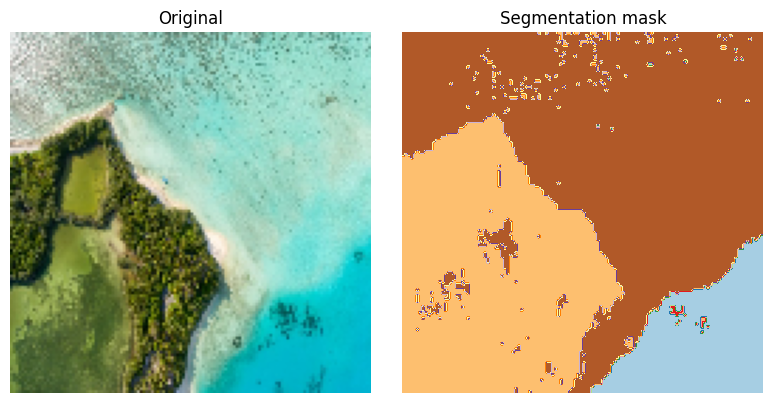

In [18]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (8,4))
axes[0].imshow( img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_rgb,cmap='Paired' ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

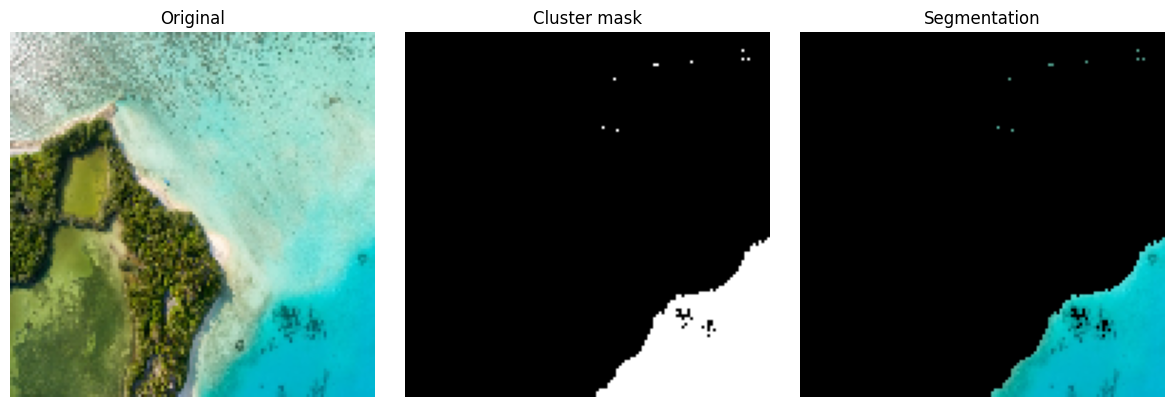

In [39]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array ( clustered_rgb == cluster , dtype = np.uint8)

#no se modifica la imaen rgb se crea es una copia del img_rgb con la f= copy
masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,4))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **HSV image**

In [28]:
# Train kmeans
n = 3
kmeans = KMeans(n_clusters = n, random_state=0)
kmeans.fit( vectorized_hsv )

KMeans(n_clusters=3, random_state=0)

In [29]:
# Predict to segment regions
clustered_hsv = kmeans.predict( vectorized_hsv)
clustered_hsv = clustered_hsv.reshape( 128,128 )

print(vectorized_hsv.shape, img_rgb.shape, clustered_hsv.shape)

(16384, 1) (128, 128, 3) (128, 128)


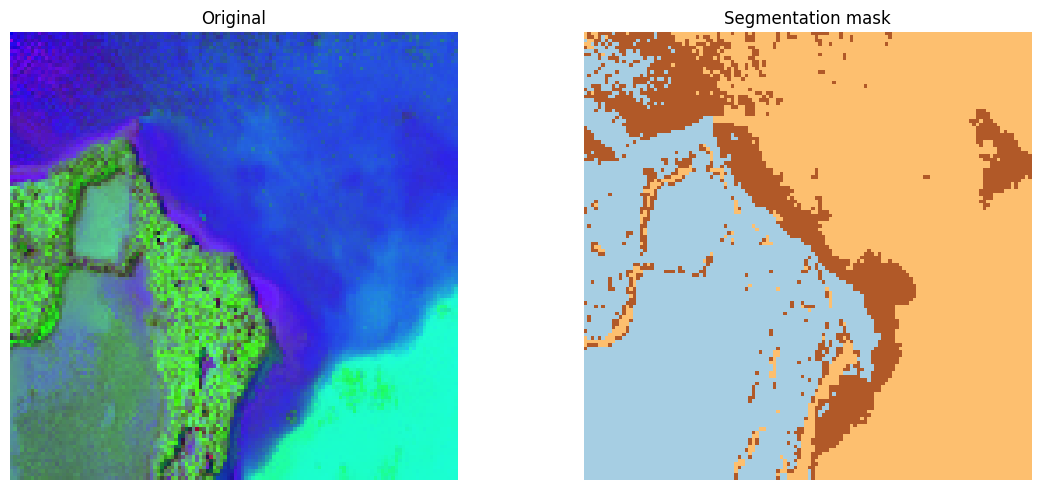

In [32]:
# Plot original and segmentation masks
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( img_hsv), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( clustered_hsv, cmap='Paired'), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

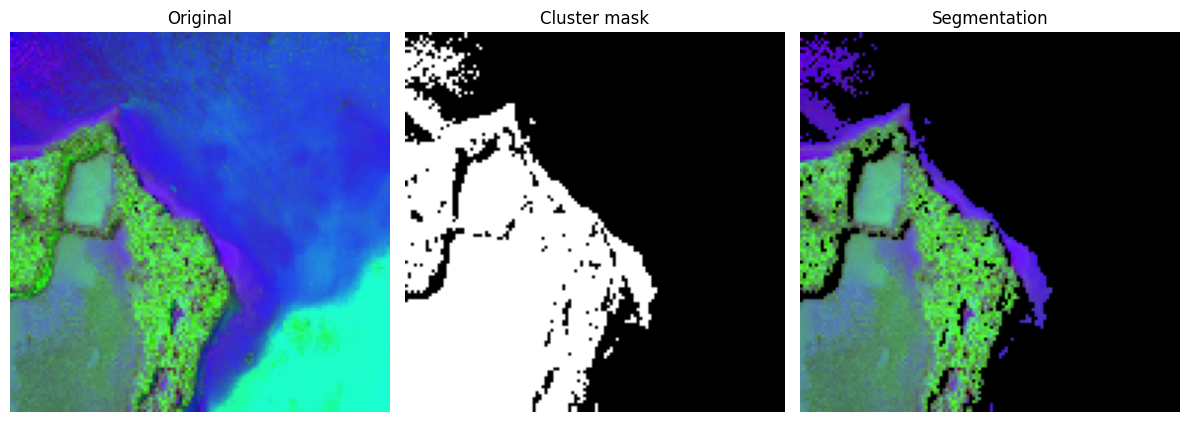

In [38]:
# Mask only the cluster number 0 (turn the rest of pixels into black)
cluster = 0

cluster_mask = np.array ( clustered_hsv == cluster , dtype = np.uint8)

masked_image = np.copy(img_hsv)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask )

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow( img_hsv ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()

## **Comparison**

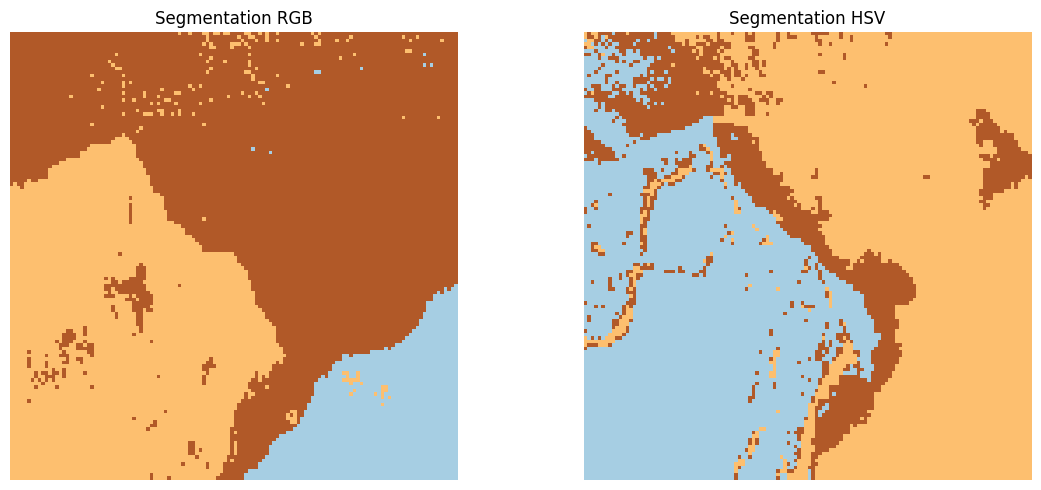

In [35]:
_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow(clustered_rgb, cmap="Paired"), axes[0].set_axis_off(), axes[0].set_title("Segmentation RGB")
axes[1].imshow(clustered_hsv, cmap="Paired"), axes[1].set_axis_off(), axes[1].set_title("Segmentation HSV")
plt.tight_layout()

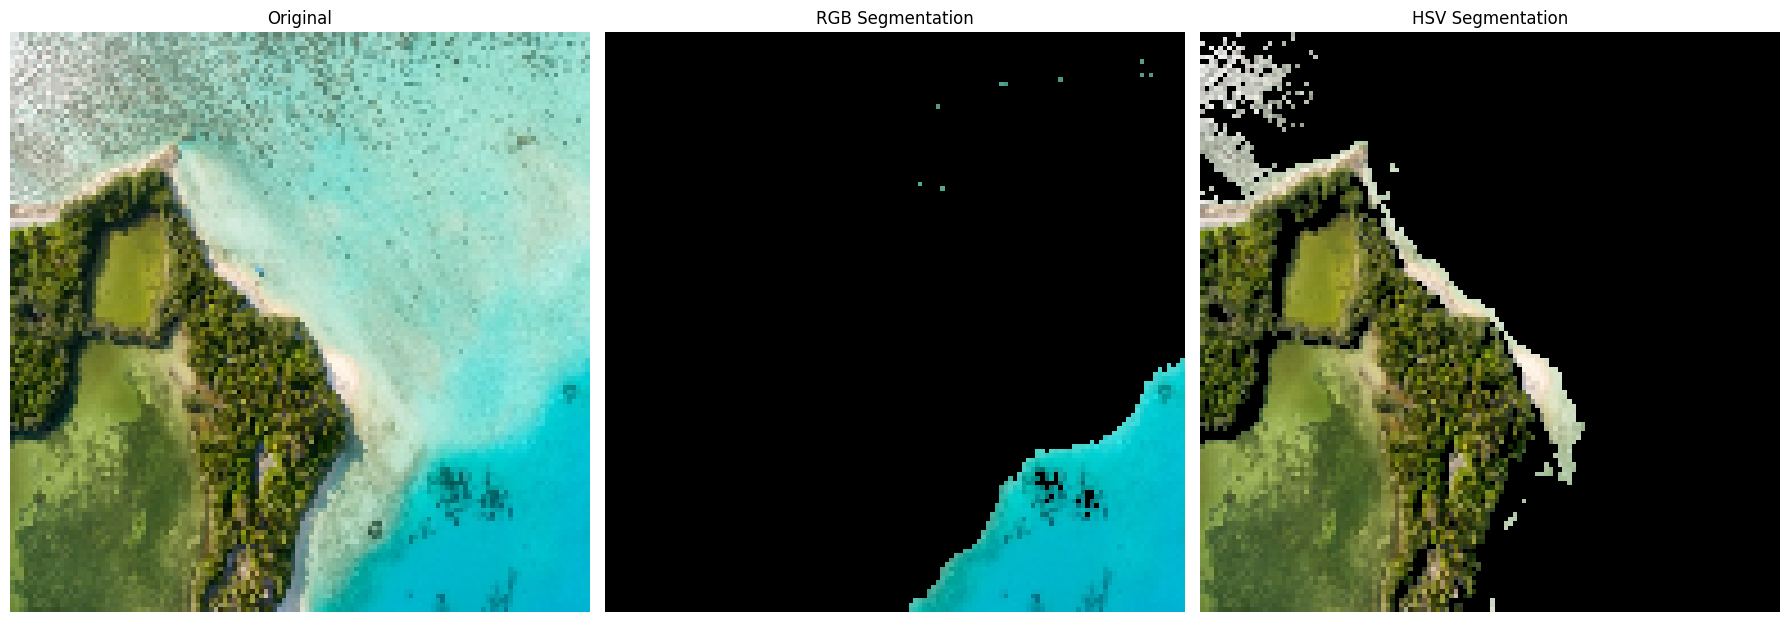

In [36]:
# Mask clusters (turn the rest of pixels into black)
cluster = 0
cluster_mask_rgb = np.array ( clustered_rgb == cluster , dtype = np.uint8)

cluster = 0
cluster_mask_hsv = np.array ( clustered_hsv == cluster , dtype = np.uint8)

masked_rgb = np.copy(img_rgb)
masked_rgb = cv2.bitwise_and(masked_rgb, masked_rgb, mask = cluster_mask_rgb  )

masked_hsv = np.copy(img_rgb)
masked_hsv = cv2.bitwise_and(masked_hsv, masked_hsv, mask = cluster_mask_hsv )

_, axes = plt.subplots (1, 3, figsize = (18,8))
axes[0].imshow(img_rgb), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow(masked_rgb), axes[1].set_axis_off(), axes[1].set_title("RGB Segmentation")
axes[2].imshow(masked_hsv), axes[2].set_axis_off(), axes[2].set_title("HSV Segmentation")
plt.tight_layout()

# **Elbow and Silhouette**

Perform an analysis based on elbow and silhouette to determine the best number of clusters

# **In random images**


Repeat the segmentation with the following images:
 - [fr1.png](https://drive.google.com/file/d/18OR0DEx-rXeVBeqgbZqhzXXyOQhMyefb/view?usp=sharing)
 - [fr2.png](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr3.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [fr4.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
